In [41]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
file1="raw_data/city_data.csv"
file2="raw_data/ride_data.csv"

ride=pd.read_csv(file2)
city=pd.read_csv(file1)
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [43]:
grpCity=city.groupby(["city"])
cityClean = grpCity["driver_count"].sum()
cityClean = cityClean.reset_index()

newCity=pd.merge(cityClean,city[["city","type"]],on="city",how="left")
newCity[newCity["city"]=="Port James"]

newCity = newCity.drop(newCity.index[72])
newCity = newCity.reset_index()
clnCity=newCity[["city","driver_count","type"]]

ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [44]:
#data=pd.merge(clnCity[["city","type"]], ride, on="city", how="inner")
#len(data)

In [45]:
grpRide = ride.groupby(["city"])
avgFare=round(grpRide["fare"].mean(),2)
sumRides=grpRide["ride_id"].count()
sumRides.head()

rideSum = pd.DataFrame({"Avg Fare":avgFare,"Total Rides":sumRides})
rideSum = rideSum.reset_index()
data=pd.merge(clnCity,rideSum,on="city")
data.sort_values("Total Rides", ascending=False).head()

,city,driver_count,type,Avg Fare,Total Rides
73,Port Johnstad,22,Urban,25.88,34
100,Swansonbury,64,Urban,27.46,34
94,South Louis,12,Urban,27.09,32
72,Port James,18,Suburban,31.81,32
0,Alvarezhaven,21,Urban,23.93,31


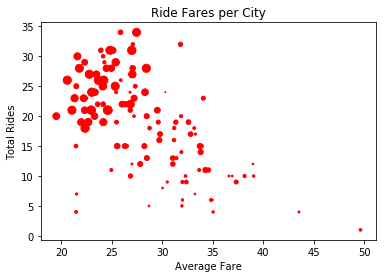

In [46]:
# X-Axis should be AVG Fare
# Y-Axis number of rides
# size of dot is driver count

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(data["Avg Fare"], data["Total Rides"], marker="o", facecolors="red", s=data["driver_count"])

# Create a title, x label, and y label for our chart
plt.title("Ride Fares per City")
plt.xlabel("Average Fare")
plt.ylabel("Total Rides")

plt.show()

In [47]:
data2=pd.merge(clnCity[["city","type"]], ride, on="city", how="inner")
len(data)

grpData = data2.groupby("type")

totalFare=data2["fare"].sum()
totalRides=data2["ride_id"].count()
totalDrivers=clnCity["driver_count"].sum()
explode = (0.1, 0, 0)
colors=["green","yellow","red"]

In [48]:
fareByType = grpData["fare"].sum()
fare=fareByType.reset_index()
fare["% Total"]=fare["fare"]/totalFare
fare = fare.sort_values("% Total", ascending=False)
fare

,type,fare,% Total
2,Urban,40078.34,0.629655
1,Suburban,19317.88,0.303495
0,Rural,4255.09,0.066850


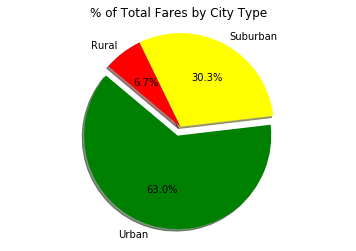

In [54]:
plt.pie(fare["% Total"], explode=explode, labels=fare["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

In [50]:
rideByType = grpData["ride_id"].count()
rides=rideByType.reset_index()
rides["% Total"]=rides["ride_id"]/totalRides
rides = rides.rename(columns={"ride_id":"rides"})
rides = rides.sort_values("% Total", ascending=False)
rides

,type,rides,% Total
2,Urban,1625,0.684211
1,Suburban,625,0.263158
0,Rural,125,0.052632


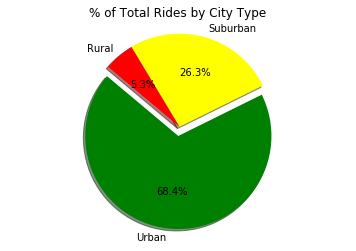

In [55]:
plt.pie(rides["% Total"], explode=explode, labels=rides["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

In [52]:
grpCity = clnCity.groupby(["type"])
drivers=grpCity["driver_count"].sum()
drivers=drivers.reset_index()
drivers["% Total"]=drivers["driver_count"]/totalDrivers
drivers=drivers.sort_values("% Total", ascending=False)
drivers

,type,driver_count,% Total
2,Urban,2607,0.778441
1,Suburban,638,0.190505
0,Rural,104,0.031054


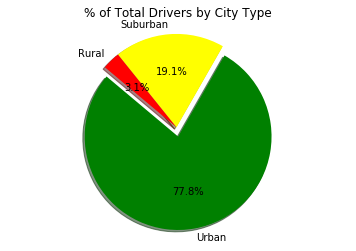

In [56]:
plt.pie(drivers["% Total"], explode=explode, labels=drivers["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

In [ ]:
#OBSERVABLE TRENDS
#1 The majority of all fares, rides, and drivers are in the more densly populated urban areas
#2 The majority of rides tend to be have a fare less than $30
#3 The number of drivers does not have a great affect on the number of rides those drivers give.  In the dense areas where there are a large amount of drivers, they account for over 15 rides per driver